In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [12]:
df = pd.read_csv('Wind.csv')
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,NW,7.0,...,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
362,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,NNW,2.0,...,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
363,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,ENE,11.0,...,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
364,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,WNW,6.0,...,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No


In [13]:
df = df.dropna()

In [ ]:
# import category_encoders as ce
# enc = ce.OrdinalEncoder(cols = ['class'], return_df = True, mapping = [{'col':'class', 'mapping':{'malignant':0, 'benign':1}}])
# dfx = enc.fit_transform(df)
# dfx

In [14]:
from sklearn import preprocessing
sti = preprocessing.LabelEncoder()
df = df.apply(sti.fit_transform)
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,90,111,0,15,43,7,8,12,7,2,...,15,93,82,7,7,95,129,0,16,1
1,138,130,16,20,75,1,12,0,13,1,...,22,37,27,5,3,123,145,1,16,1
2,135,106,16,27,24,7,33,3,5,2,...,55,20,22,8,7,103,99,1,43,1
3,133,42,43,34,69,7,20,14,13,15,...,42,7,21,2,7,88,50,1,13,1
4,86,46,13,26,84,10,18,10,2,10,...,35,84,113,7,7,68,60,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,100,152,0,36,99,6,29,10,7,3,...,2,64,46,1,3,148,167,0,0,0
362,81,141,0,51,104,3,17,6,6,0,...,8,95,98,0,1,120,160,0,0,0
363,125,78,0,40,36,2,14,1,1,5,...,33,131,147,3,2,96,81,0,0,0
364,125,130,0,23,50,7,16,11,14,2,...,25,103,91,6,7,107,146,0,0,0


In [15]:
featured_cols = ['Rainfall', 'Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RISK_MM']
x = df[featured_cols]
y = df.RainTomorrow
x

,Rainfall,Evaporation,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM
0,0,15,8,2,9,29,15,93,82,7,7,95,129,0,16
1,16,20,12,1,7,41,22,37,27,5,3,123,145,1,16
2,16,27,33,2,1,43,55,20,22,8,7,103,99,1,43
3,43,34,20,15,11,23,42,7,21,2,7,88,50,1,13
4,13,26,18,10,13,29,35,84,113,7,7,68,60,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,0,36,29,3,22,1,2,64,46,1,3,148,167,0,0
362,0,51,17,0,8,6,8,95,98,0,1,120,160,0,0
363,0,40,14,5,3,24,33,131,147,3,2,96,81,0,0
364,0,23,16,2,13,30,25,103,91,6,7,107,146,0,0


In [16]:
sc = StandardScaler()
df_scaled = sc.fit_transform(x)
df_norm = normalize(df_scaled)
df_norm = pd.DataFrame(df_norm)

In [17]:
pca = PCA(n_components = 2)
df_prp = pca.fit_transform(df_norm)
df_prp = pd.DataFrame(df_prp)
df_prp.columns = ['X', 'Y']

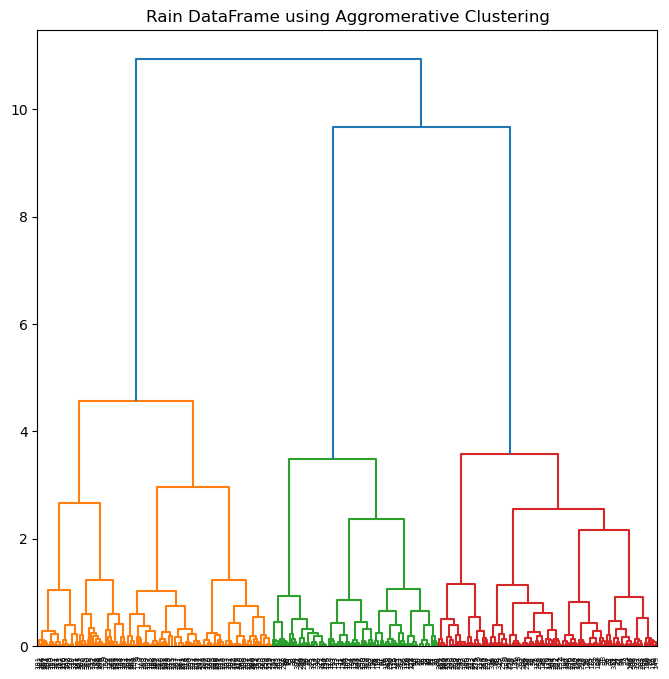

In [21]:
plt.figure(figsize = (8, 8))
plt.title('Rain DataFrame using Aggromerative Clustering')
Dendogram = shc.dendrogram((shc.linkage(df_prp, method = 'ward')))

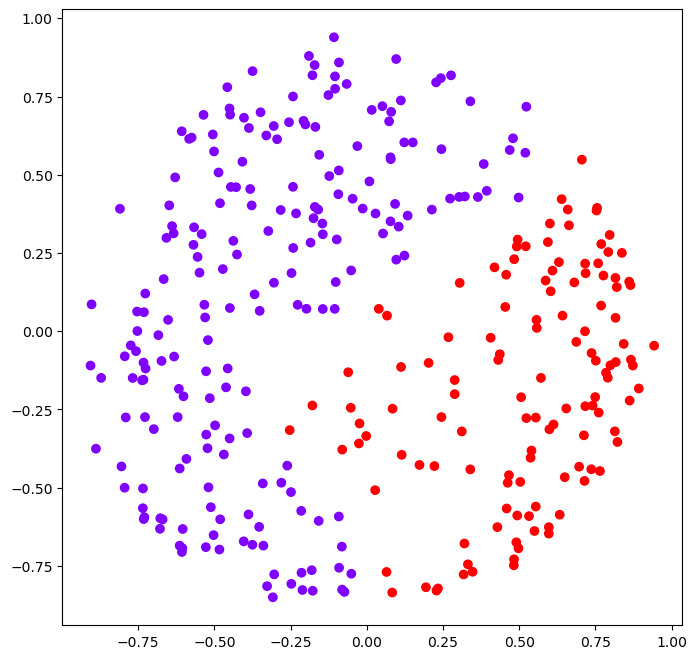

In [19]:
agg2 = AgglomerativeClustering(n_clusters = 2)
plt.figure(figsize = (8,8))
plt.scatter(df_prp['X'], df_prp['Y'], c = agg2.fit_predict(df_prp), cmap = 'rainbow')
plt.show()